#Alzheimer's Predictive Analytics

##Group 1:

Teja Swaroop Sayya,
Venkata Kiran karnam,
Ramesh Venkat Reddy Konda,
Ruchitha Reddy Katta,
Rohith Reddy Alla.

###Project Introduction:
This project aims to analyze the Alzheimer's disease dataset to identify factors associated with the diagnosis. The dataset contains demographic, lifestyle, and behavioral characteristics of patients. The goal is to develop a predictive model to identify the likelihood of an Alzheimer's disease diagnosis. This project will use supervised learning with a target variable (Diagnosis) and employ classification methods.

###Research Question:

What are the most significant predictors of cognitive decline in patients with Alzheimer's disease, and can a model be developed to identify high-risk individuals?

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

alz=pd.read_csv('alzheimers_disease_data.csv')
print(alz.head())
# alz.head()

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

Research Question:

In [7]:
alz

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [8]:
alz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

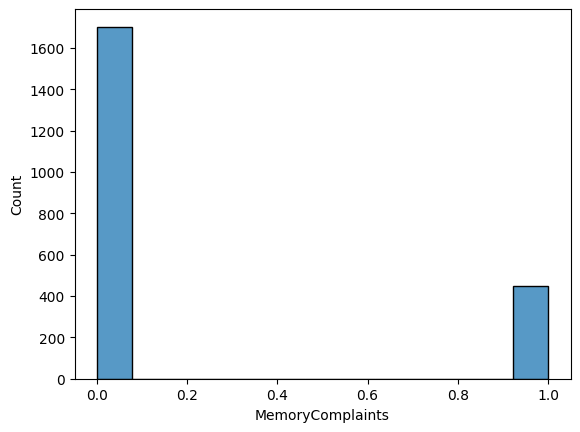

In [10]:
sns.histplot(alz["MemoryComplaints"])
plt.show()

In [11]:
alz.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


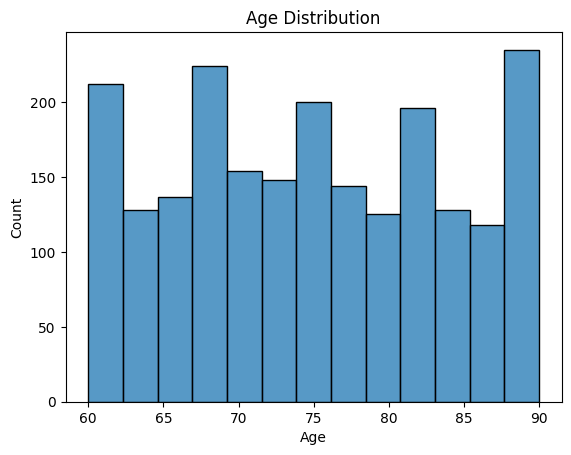

In [14]:
#Age Distribution
sns.histplot(alz['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

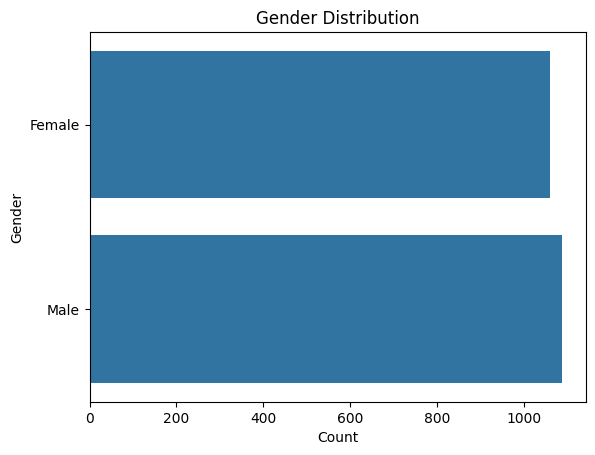

In [19]:
# Gender Distribution

# mapping 1-> Male & 0: Female
gender_map={1:'Male', 0:'Female'}

alz['Gender_label'] = alz['Gender'].map(gender_map)

sns.countplot(alz['Gender_label'])
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

###Data Preprocessing
Drop the PatientID and DoctorInCharge columns as they are not relevant to the analysis.
Convert the Gender and Ethnicity columns to categorical variables.
Scale the Age, BMI, AlcoholConsumption, PhysicalActivity, and DietQuality columns using Standard Scaler.
Encode the EducationLevel column using Label Encoder.

In [46]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check if columns exist before dropping
if 'PatientID' in alz.columns and 'DoctorInCharge' in alz.columns:
    alz = alz.drop(['PatientID', 'DoctorInCharge'], axis=1)
else:
    print("One or both columns 'PatientID' and 'DoctorInCharge' are not found in the DataFrame.")

# Convert categorical variables
alz['Gender'] = alz['Gender'].astype('category')
alz['Ethnicity'] = alz['Ethnicity'].astype('category')

# Scale numerical columns
scaler = StandardScaler()
alz[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality']] = scaler.fit_transform(alz[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality']])

# Encode EducationLevel
le = LabelEncoder()
alz['EducationLevel'] = le.fit_transform(alz['EducationLevel'])

One or both columns 'PatientID' and 'DoctorInCharge' are not found in the DataFrame.


###Data Preprocessing
###Feature Selection
Select the most relevant features using Recursive Feature Elimination (RFE) with a Random Forest classifier.
Choose the top 10 features.


--------

In [47]:
print(alz.info())

# Encode categorical variables
label_encoder = LabelEncoder()
alz['Gender'] = label_encoder.fit_transform(alz['Gender'])
alz['Ethnicity'] = label_encoder.fit_transform(alz['Ethnicity'])
alz['EducationLevel'] = label_encoder.fit_transform(alz['EducationLevel'])

# Select relevant features and target variable
features = ['Age', 'AlcoholConsumption', 'Ethnicity', 'FamilyHistoryAlzheimers',
            'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
target = 'Diagnosis'

X = alz[features]
y = alz[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   float64 
 1   Gender                     2149 non-null   category
 2   Ethnicity                  2149 non-null   category
 3   EducationLevel             2149 non-null   int64   
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   int64   
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   int64   
 11  CardiovascularDisease      2149 non-null   int64   
 12  Diabetes                   2149 non-null   int64   
 13  Depression                 2149 n

###Exploratory Data Analysis (EDA)

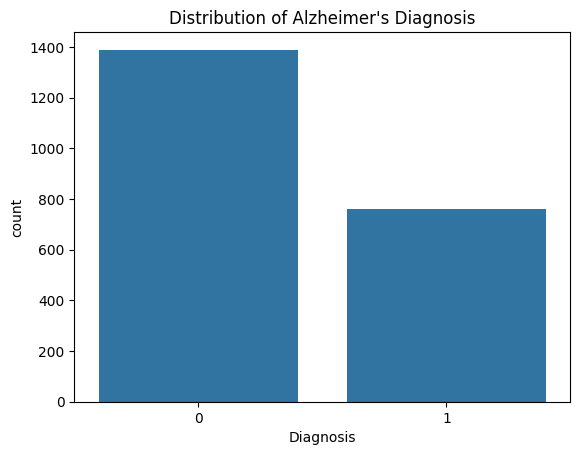

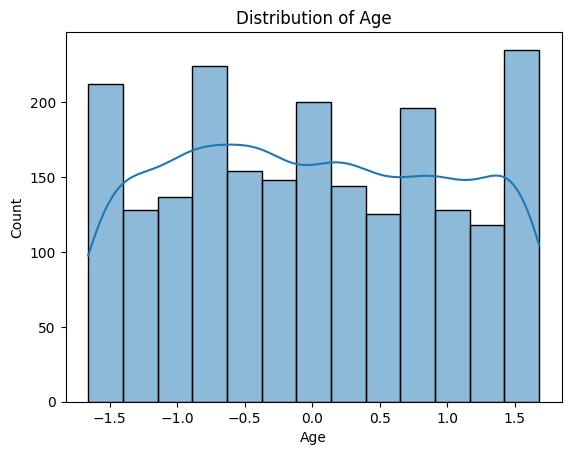

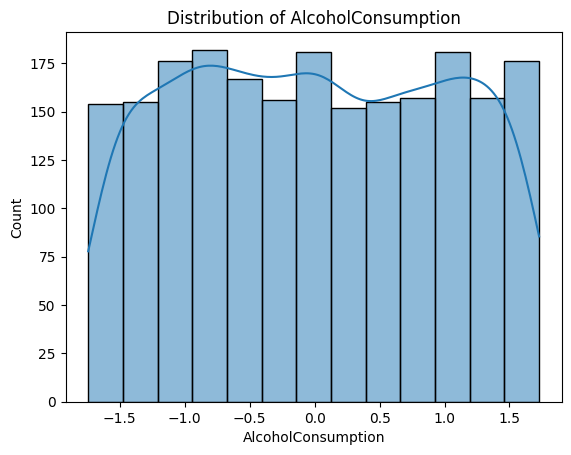

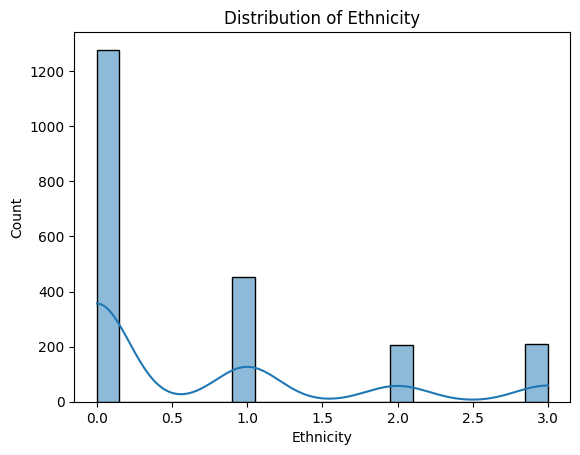

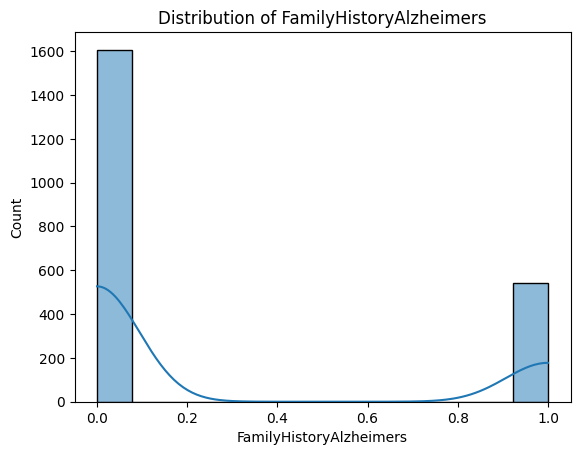

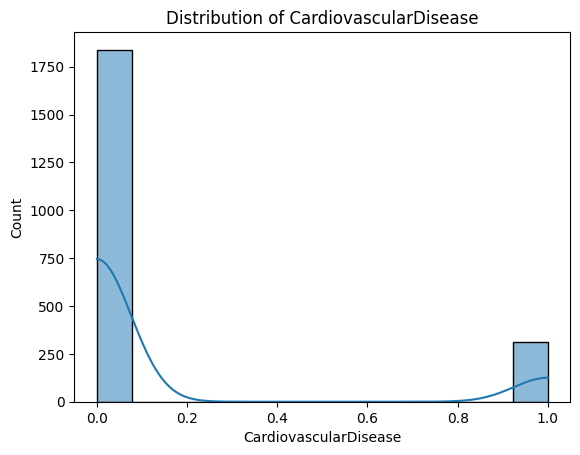

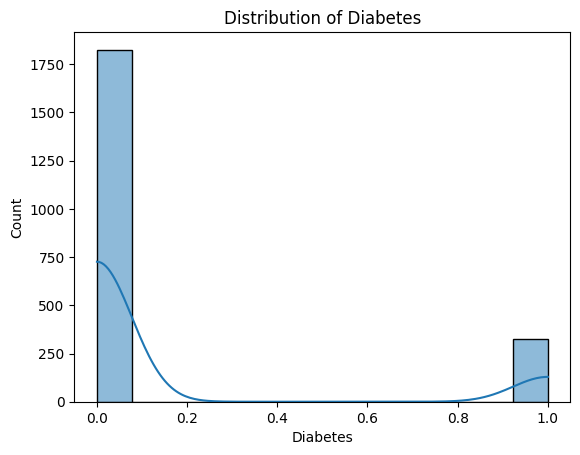

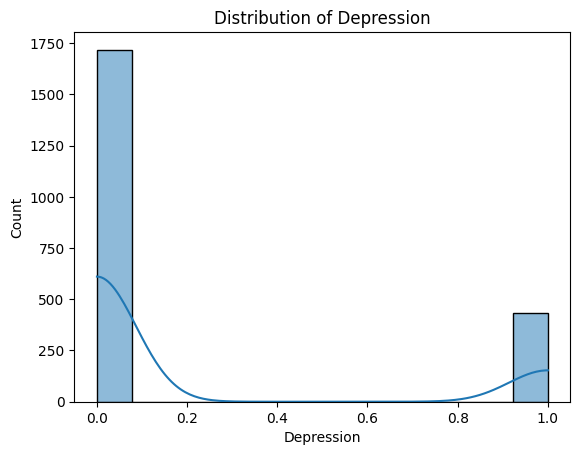

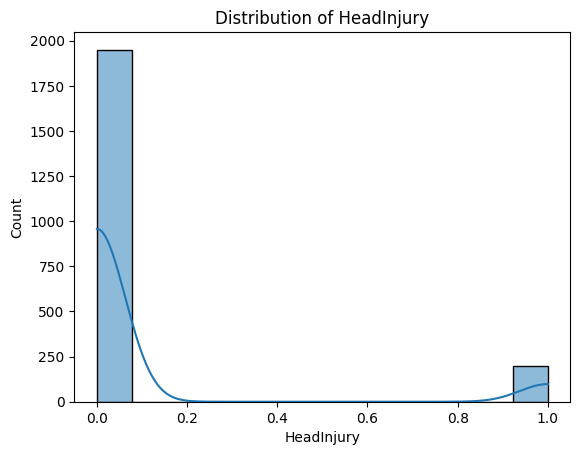

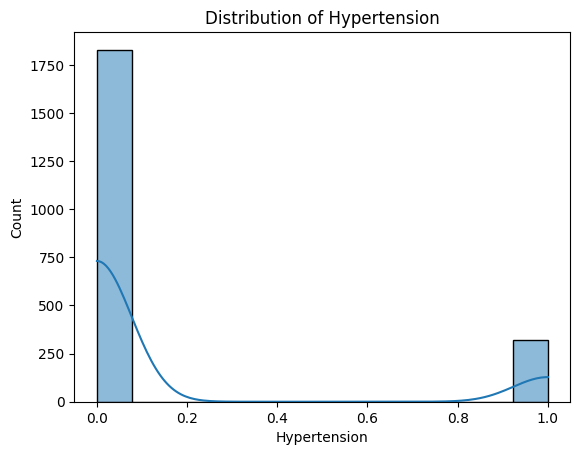

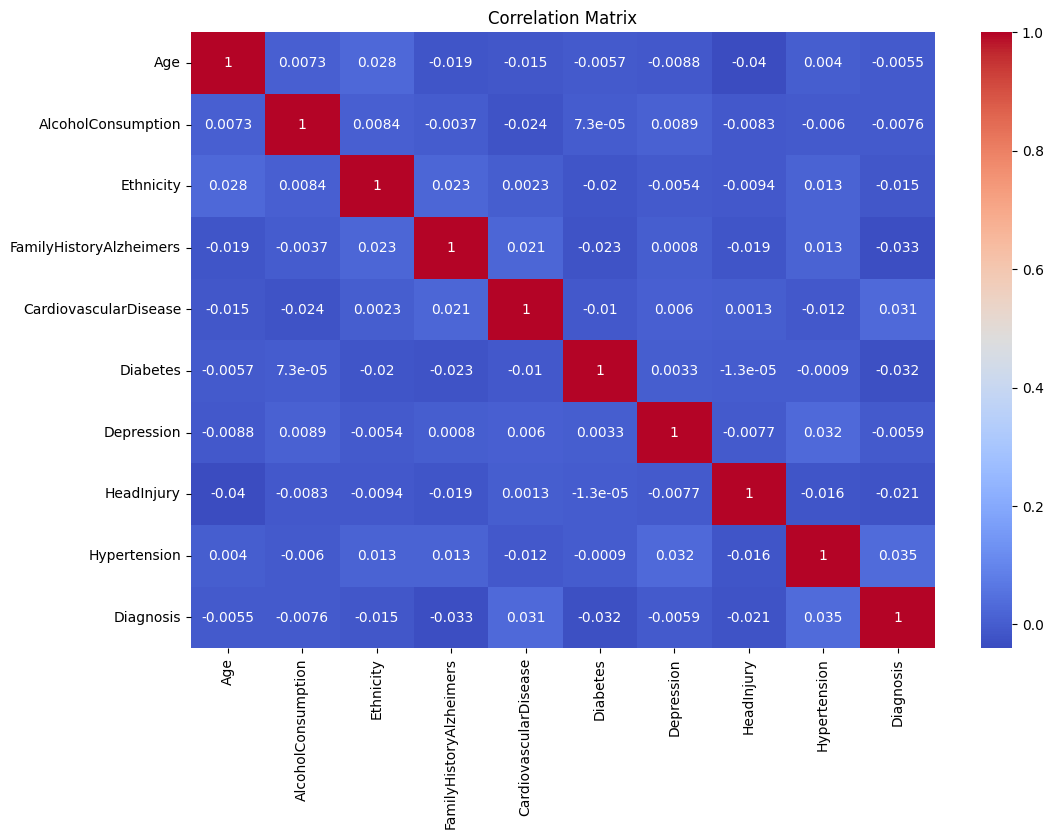

In [49]:
diagnosis_map={1:'Yes', 0:'No'}

alz['diagnosis_label'] = alz['Diagnosis'].map(diagnosis_map)

# sns.countplot(alz['diagnosis_label'])


sns.countplot(x='Diagnosis', data=alz)
plt.title('Distribution of Alzheimer\'s Diagnosis')
plt.show()

# Plot the distribution of key variables
for feature in features:
    plt.figure()
    sns.histplot(alz[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot the correlation matrix
# corr_matrix = alz[features + [target]].corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# Plot the correlation matrix
corr_matrix = alz[[*features, target]].corr() # Use unpacking and a single list
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###Model Development

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')


Accuracy: 0.58
Precision: 0.37
Recall: 0.25
AUC-ROC: 0.51


###Interpretation of Results

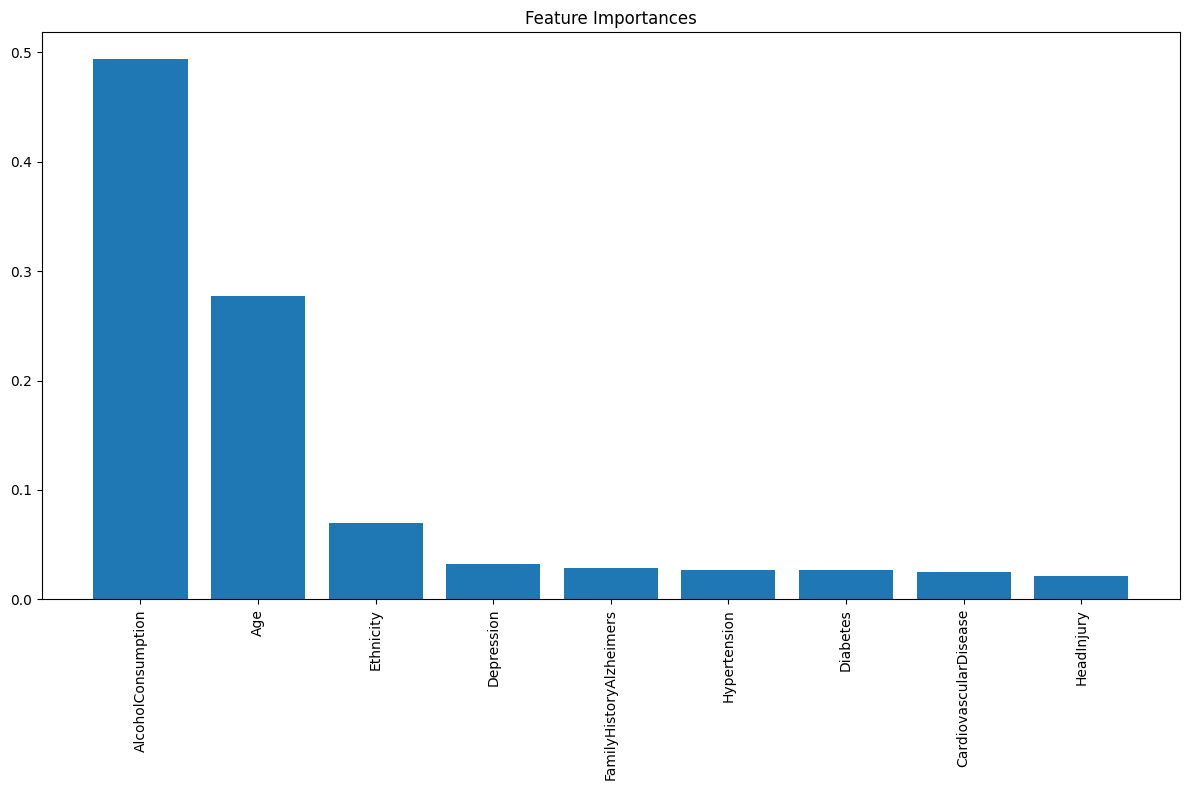

In [36]:
# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.tight_layout()
plt.show()
